# Lecture 4: Data Visualization
## 10/13/19
### Hosted and maintained by [Student Association for Applied Statistics (SAAS)](https://saas.berkeley.edu). Authored by [Angela Zhou](mailto:zhoa210@berkeley.edu) and [Ellis Cho](mailto:choellis0510@berkeley.edu).

### Table of Contents
* [Types of Variables](#typesofvariables)
* [Lineplots](#lineplots)
    * [Lineplots in Matplotlib](#pltlineplots)
    * [Lineplots in Seaborn](#snslineplots)
    * [Hue in Seaborn](#snshue)
* [Scatterplots](#scatterplots)
    * [Scatterplots in Matplotlib](#pltscatter)
    * [Scatterplots in Seaborn](#snsscatter)
* [Kernel Density Estimation Plots](#snskde)

## Steps for changing this notebook:

## Accessing the notebook
 1. go to the correct github folder `Fall-2019-Career-Exploration`on your laptop terminal and `cd` into it
 2. type `git pull --rebase` 
 > VERY IMPORTANT STEP!!
 > this will update your local folder with whatever has been done and most recently put into the shared github folder
 3. go into  `Lecture4` and type `jupyter notebook` to run your local host 
 4. Click on the "Data Visualization" notebook
 5. Then do whatever you want to the notebook
 6. Be sure to save your notebook frequently (with "Save and Checkpoint")
 
## When you're done
1. Save and Checkpoint the notebook 
2. Go to your terminal
3. Press "control" and "c" at the same time to exit form your local jupyter notebook thing
4. Type "y" and enter
5. Then type `git status` 
> this will show the status of your github repo. It should show you the name of the file you changed in RED
6. Then type `git add [name of file you changed]`
7. Type `git status` again to check the status. The file name should now be GREEN which is good because that means that git is tracking your file
8. Type `git commit -m "[message]"` The message can be whatever you want but please make it informative. Also this has to be a string so don't forget your quotes
9. VERY IMPORTANT!! Type `git pull --rebase`
 > If you forget this we will have merge conflicts and want to cry :'(
10. Then type `git push` and this will push your file to the official SUSA github repo. 
 > PLEASE PLEASE PLEASE ALWAYS make sure you type `git pull --rebase` before you push
11. This should be it I hope lmao 
    

In [16]:
# Setup code
import seaborn as sns #; sns.set()
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
from pathlib import Path

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

bike = pd.read_csv('bikeshare.txt')

<a id='typesofvariables'></a>
## Types of Variables

Understanding what types of data you're working with—and hence what types of variables your data has—is essential when determining what kinds of visualizations may be most appropriate and most effective to illustrate your data. Not all visualizations are suited for all types of data! It is also important to understand the types of variables in your dataset when considering what specific goal(s) you want to accomplish with your visualizations; this concept will become more clear as we continue through this lecture notebook.

There are two principal categories of data, each of which can be subdivided into two subcategories; this gives us four main categories of data in total:

- **Qualitative/Categorical**: a variable that has discrete values or distinct characteristics that represent *categories*
    - **Ordinal**: a categorical variable whose categories have a clear *ordering* or sequence, so the categories have a numerical or sequential meaning. 
        - e.g. education level: `elementary school`, `middle school`, `high school`; year in Berkeley: `freshman`, `sophomore`, `junior`, `senior`
    - **Nominal**: a categorial variable whose categories exist by *name* only, with no inherent numerical value or sequential ordering
        - e.g. `Cal ID number`; major at UC Berkeley: `data science`, `statistics`, `computer science`, `economics`
- **Quantitative/Numeric**: a variable that is measured on a numeric scale
    - **Continuous**: a quantitative variable that can take on an infinite number of values; think of continuous quantitative variables as things you can measure.
        - e.g. `weight`, `temperature`, 
    - **Discrete**: a quantitative variable that can only take on certain values, usually integer values; think of discrete quantitative variables as things you can count.
        - e.g. `number of siblings`, `number of semesters completed at UC Berkeley`

## A Note on Plotting in Jupyter Notebooks

You may have noticed that many of our code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

# Matplotlib vs Seaborn
https://www.kdnuggets.com/2019/04/data-visualization-python-matplotlib-seaborn.html 

- Matplotlib is a Python data visualization library built on NumPy arrays
- Official Seaborn tutorial: https://seaborn.pydata.org/tutorial.html 
- Seaborn is based off the Matplotlib library, but is used to create more aesthetic and informative graphics

The data we are exploring is collected from a bike sharing system in Washington D.C.

In [2]:
# Our dataset
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total rental bikes including casual and registered 

**Practice:** identify what type of variable each of the columns (except `instant`) in our dataset represent.

In [6]:
# Cleaning the dataset 
# don't worry about this code
factor_dict = {
    'holiday': {
        0:'no', 
        1:'yes'
    },
    'weekday': {
        0: 'Sun', 
        1: 'Mon', 
        2: 'Tue', 
        3: 'Wed', 
        4: 'Thu', 
        5: 'Fri', 
        6: 'Sat'
    },
    'workingday': {
        0: 'no',
        1: 'yes'
    },
    'weathersit': {
        1: 'Clear',
        2: 'Mist',
        3: 'Light',
        4: 'Heavy'
    }
}

bike.replace(factor_dict, inplace=True)
bike.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [12]:

daily_counts = (
    bike
    .groupby(['dteday'])
    .agg(
        {
        "casual": sum, 
        "registered": sum, 
        "workingday": 'last'
        }
    )
)
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


<a id='lineplots'></a>
## Lineplots

One of the most fundamental types of plots is a lineplot. Lineplots are used to visualize relationships between **one numeric variable** on the y-axis and **one ordinal variable** on the x-axis. A lineplot consists of data points, often called *markers*, that are plotted on an *x,y* coordinate plane with straight lines connecting one point to the next. Often, lineplots are used to illustrate a trend in data values over a series of time, and hence the line follows chronological order from left to right; more specifically this plot would be called a *time series* plot.

<a id='pltlineplots'></a>
### Lineplots in Matplotlib
[Lineplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) are the simplest, most basic type of data visualization that you can plot in Matplotlib. They are created using the `plt.plot()` function, whose argument is just some data that we want to visualize! This data can be in the form of a NumPy array or a Python list.

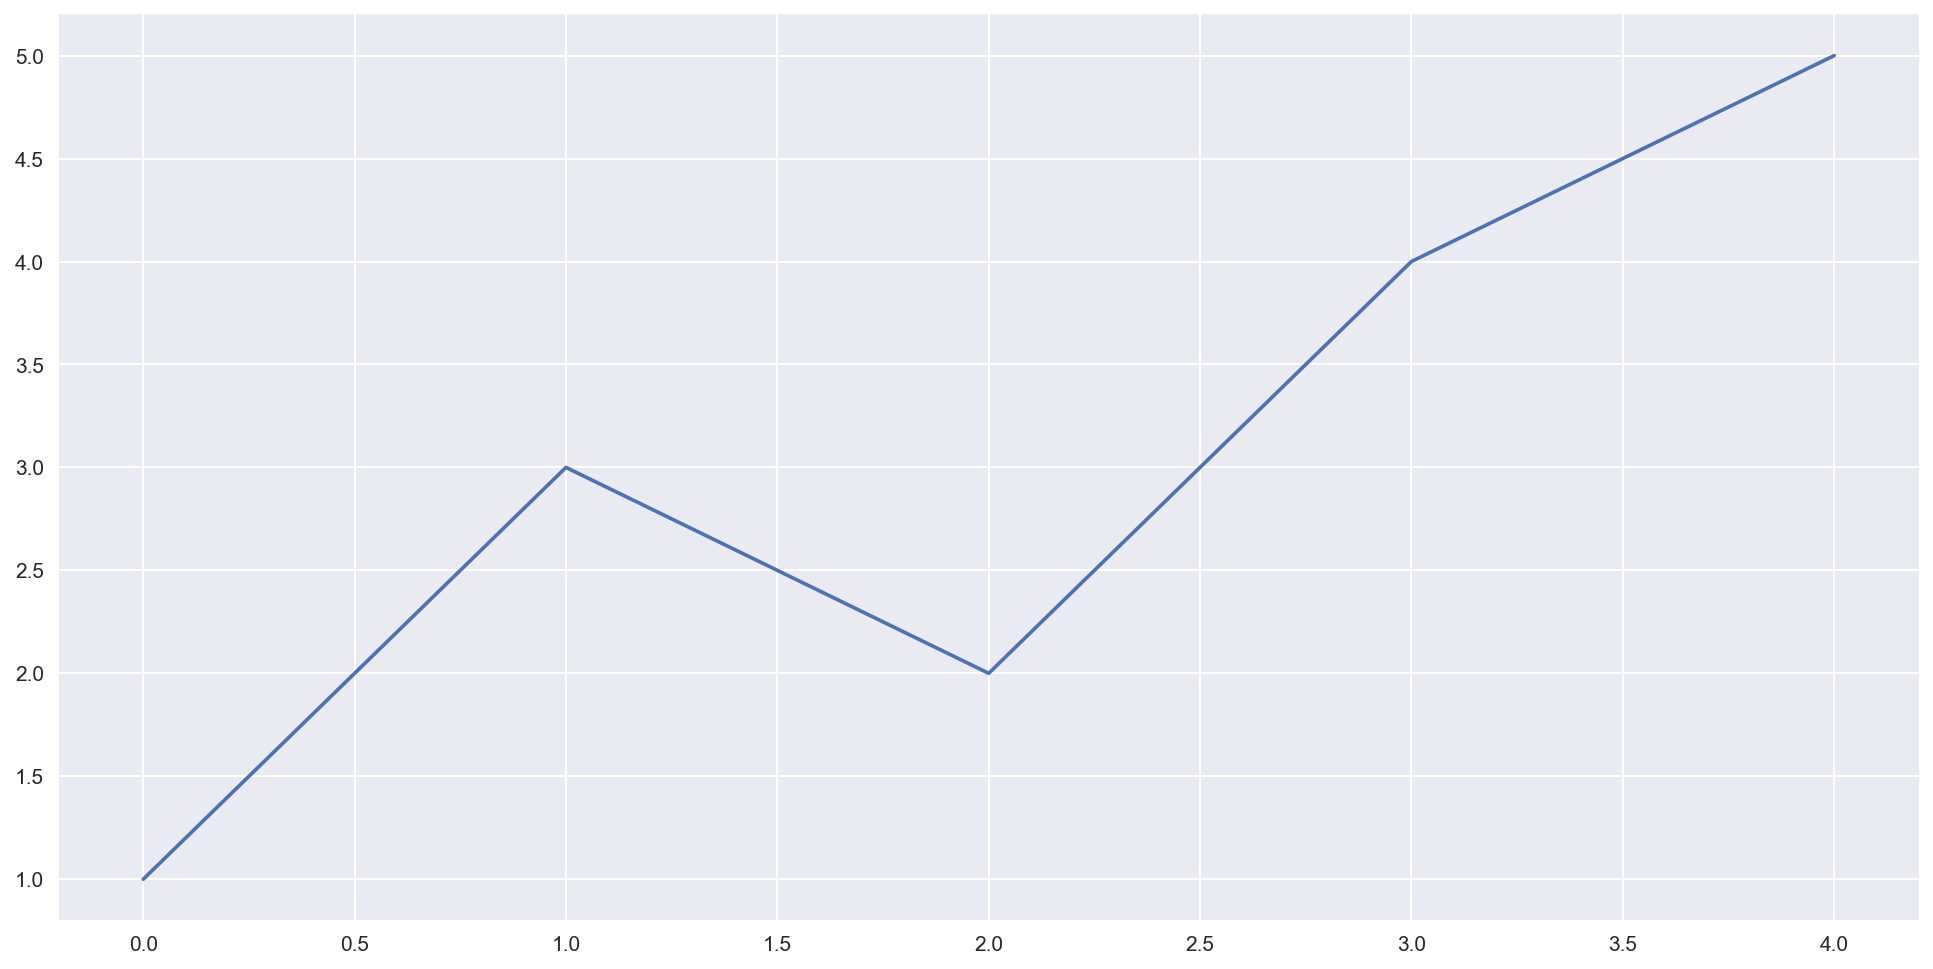

In [3]:
# Run this cell to see one way how `plt.plot()` works!
plt.plot([1, 3, 2, 4, 5])
plt.show()

In the cell above, the list `[1, 3, 2, 4, 5]` that we passed into the `plt.plot()` function, because it is the only data argument, is assumed by Matplotlib to be a list of the y-values. Hence, it automatically assigns the integers `[0, 1, 2, 3, 4]` to be the x-values. When you plot values in this way, it will automatically assign x-values as a range from 0 up to the length of the y-values you passed in. 

If you want to define the x-values, you can just pass them in as the first argument, so you have the option of calling plot in either of the following ways:
    
    plt.plot(y_values)
    plt.plot(x_values, y_values)
    
**Pro-tip:** After typing `plt.plot()` into a Jupyter Notebook code cell, you can use the `shift+tab` trick to see what arguments `plt.plot()` takes in.

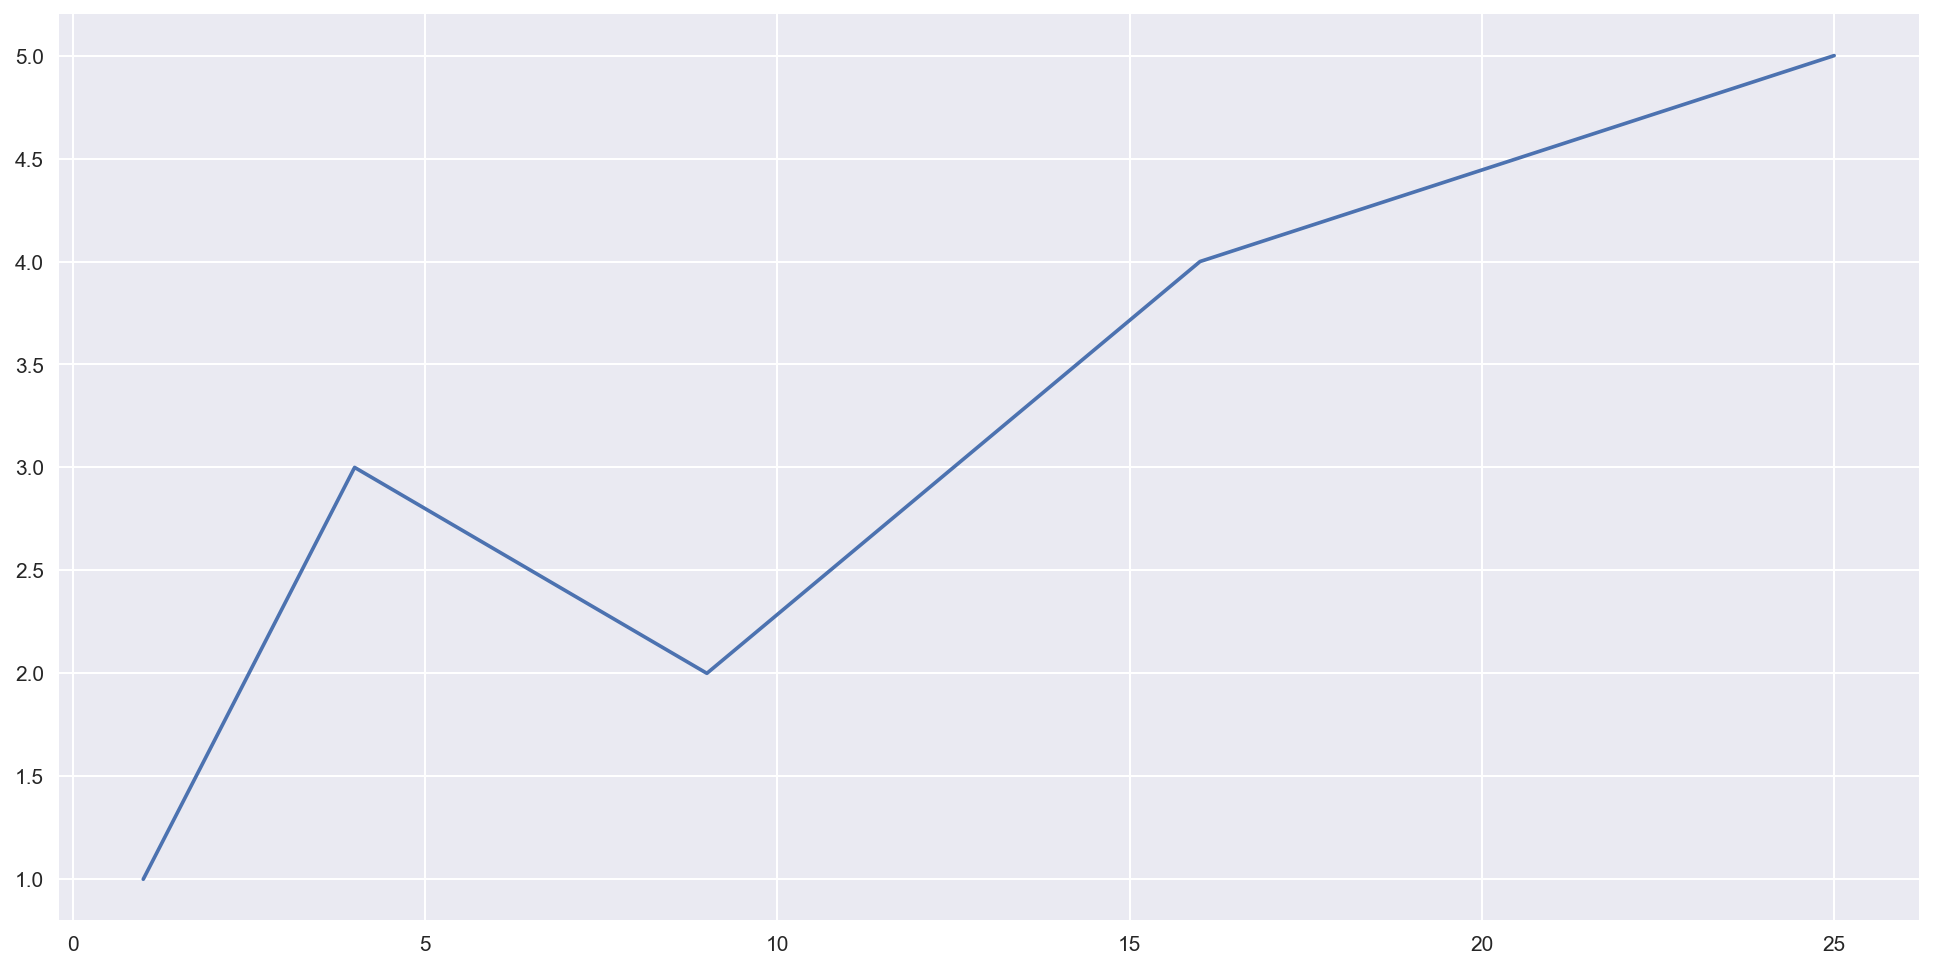

In [7]:
# Run this cell to see how we can pass in `x_values` and `y_values` into `plt.plot()`
plt.plot([1, 4, 9, 16, 25], [1, 3, 2, 4, 5])
plt.show()

### Formatting Plots

What if you wanted to make your line red instead of blue? Or dashed? **Matplotlib Pyplot** has a built in feature for formatting your plots, in the form of a *format string* as an optional argument to any plot function. Format strings are of the form:

    fmt = '[color][marker][line]'

Each of these are represented by a character (or two), and each is optional. Here are some examples of options for formatting. For a more complete list of options check out the **Notes** section at [this link](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- color: sets color
    - `b` blue
    - `b` green
    - `r` red
- marker: sets the shape of points (for scatter plots)
    - `.` point
    - `o` circle
    - `*` star
- line: sets the style of the line
    - `-` solid line
    - `--` dashed line
    - `:` dotted line

**Practice:** Use the `bike_hr_avg_counts` dataframe below to plot the average number of **registered** bikeshare riders per hour of the day. Label your axes and add a title. Feel free to visually customize your plot in any other way that you wish with tick marks, colors, marker styles, and line styles of your choice.

In [5]:
bike_hr_avg_counts = bike[["hr", "casual", "registered"]].groupby("hr").agg(np.mean).set_index(np.arange(0,24))
bike_hr_avg_counts["hr"]=np.arange(1,25)
bike_hr_avg_counts.head()

,casual,registered,hr
0,10.158402,43.739669,1
1,6.504144,26.871547,2
2,4.772028,18.097902,3
3,2.715925,9.011478,4
4,1.253945,5.098996,5


In [6]:
# Your code here

**Challenge:** Also using the `bike_hr_avg_counts` dataframe, plot the average number of casual riders per hour of the day and the average number of registered riders per hour of the day **on the same plot**. Make the `registered` rider plot red and make the `casual` rider plot blue.

In [7]:
# Your code here

<a id='snslineplots'></a>
### Lineplots in Seaborn
The function to create [Lineplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.lineplot.html) follow a very similar to its Matplotlib counterpart in terms of its arguments. Like `plt.plot()` in Matplotlib, the arguments of `sns.lineplot()` can be either NumPy arrays or Python lists.

    sns.lineplot(x_values, y_values)
    
**Practice:** Recreate your lineplot of the average number of registered bikeshare riders per hour of the day, this time using Seaborn.

In [8]:
# Your code here

Something that's extra cool about using Seaborn is that in some ways it is less verbose than Matplotlib. For example, in Matplotlib we would have to specify our x-values as `bike_hr_avg_counts["mnth"]` and our y-values as `bike_hr_avg_counts["cnt"]`. However, because our list of x-values and our list of y-values come from the same dataframe, Seaborn can make this more concise with the following syntax:

    sns.lineplot(data=dataframe_name, x="x_values", y="y_values")
    
Note that the `data` argument is the name of your dataframe, while `x` and `y` are strings that are the column names of the `x` and `y` variables you want to plot. This code is more readable and concise than the previous syntax because it specifies the dataframe name only once, since repeating the dataframe name in `sns.lineplot(bike_hr_avg_counts["hr"], bike_hr_avg_counts["registered"]`, for example, can be redundant.

**Practice:** Recreate your **overlaid** lineplot that includes the plot of both average number of registered riders per hour of the day and casual riders per hour of the day, but this time using this cool new Seaborn syntax! 

In [9]:
# Your code here

Plotting lineplots in Seaborn also has some other useful and cool features. For example, the lineplot we've been creating has been from data that has one singular count value per one singular month value. Run the following code to see how Seaborn can plot the a similar lineplot to our previous visualization of the average number of registered riders per hour of the day: here we call upon the original `bike` dataframe, but this time our visualization includes new interesting information about our data.

In [ ]:
sns.lineplot(data=bike, x="hr", y="registered")

Notice that the lineplot itself is the same, but now there is a lightly shaded region surrounding it. This region represents the spread or variability of the y-values at every x-value point, while the solid line represents the "middle" or average y-value per x-value. The larger the light shaded area, the greater spread or variability the y-values have at that particular given x-value.

<a id='snshue'></a>
### `Hue` in Seaborn
`sns.lineplot()` also has the optional argument `hue` which is set to a column name in your dataframe that you want to color code; generally you want to color code according to some type of categorical variable.

For example, we can color code our plot of average number of registered riders per hour of the day according to the variable `workingday`. We do this by setting `hue="workingday"` within the `sns.lineplot()` function. The result is an overlaid lineplot: one plot represents average number of registered riders per hour of the way on working days (`workingday=1`), and the other represents average number of registered riders per hour of the way on non-working days (`workingday=0`).

**Note that the `hue` argument is not limited to only `sns.lineplot()`.** It can be used for many many other Seaborn plots too!

In [ ]:
sns.lineplot(data=bike, x="hr", y="registered", hue="workingday")

**Practice:** Create a lineplot of the average **total** rider count per hour of the day. Color code according to `weathersit`, which identifies the type of weather on the day of a particular bikeshare instance. Discuss with your neighbor about your interpretations of your plot. 

*Hint:* Because `weathersit` takes on more than two values, the optional `palette` argument can be used to select aa color code scheme of choice. The `palette` argument in Seaborn is set to a string that identifies a particular Seaborn color code palette. More about color palette codes can be found [here](http://jose-coto.com/styling-with-seaborn). Experiment with which palettes you like!

In [ ]:
# Your code here

## Bar Plots

Barplots show the relationship between a numerical and a categorical variable. Each bar is a different category and the height of each bar is the numerical value.
- Matplotlib documentation for [bar plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)
- Seaborn documentation for [bar plots](https://seaborn.pydata.org/generated/seaborn.barplot.html)

Text(0.5,1,'Total Number of Bike Rides for Each Weather Condition')

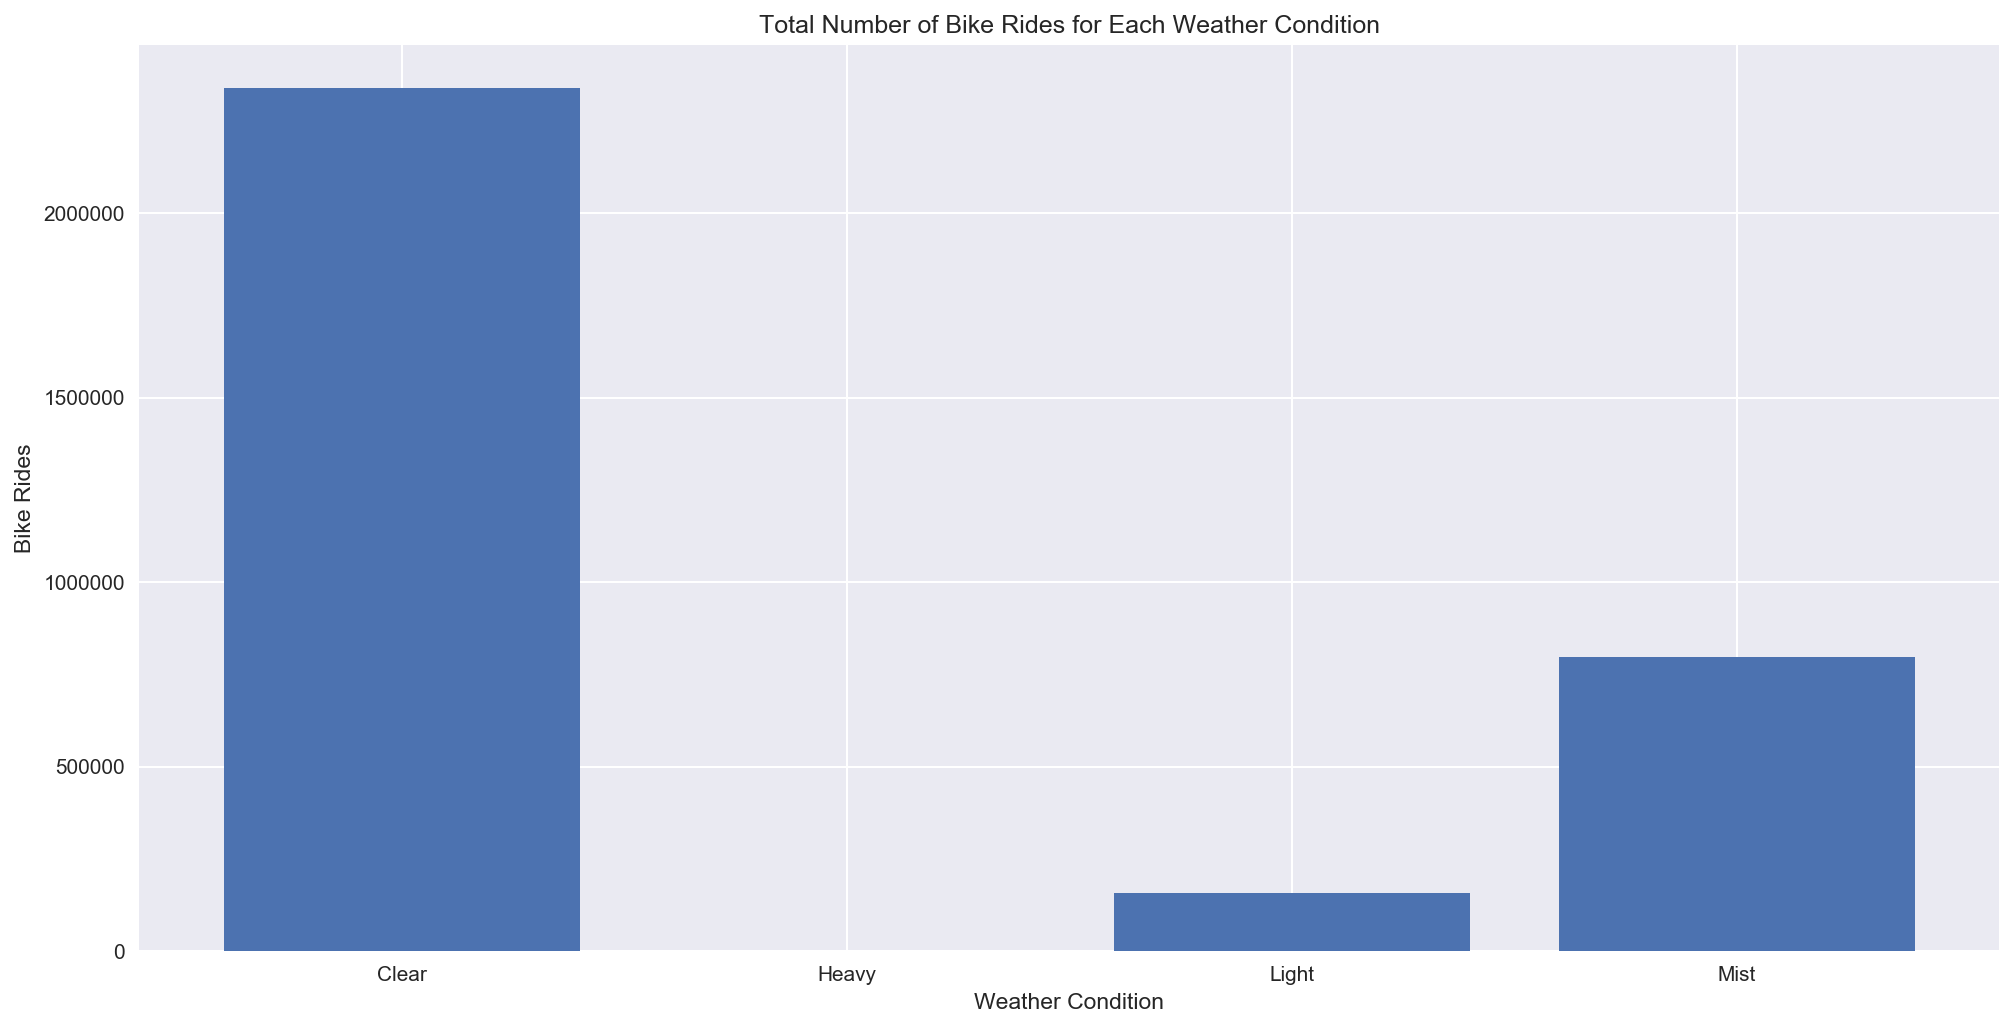

In [8]:
# Matplotlib

# This groups the bike sharing dataset by the column "weathersit" and sums the rest of the columns. 
# Why do we want to sum instead of just calling count?

weather = bike.groupby("weathersit").sum()
plt.bar(x = weather.index, height = weather['cnt']);
plt.xlabel("Weather Condition")
plt.ylabel("Bike Rides")
plt.title("Total Number of Bike Rides for Each Weather Condition")

Text(0.5,1,'Total Number of Bike Rides for Each Weather Condition')

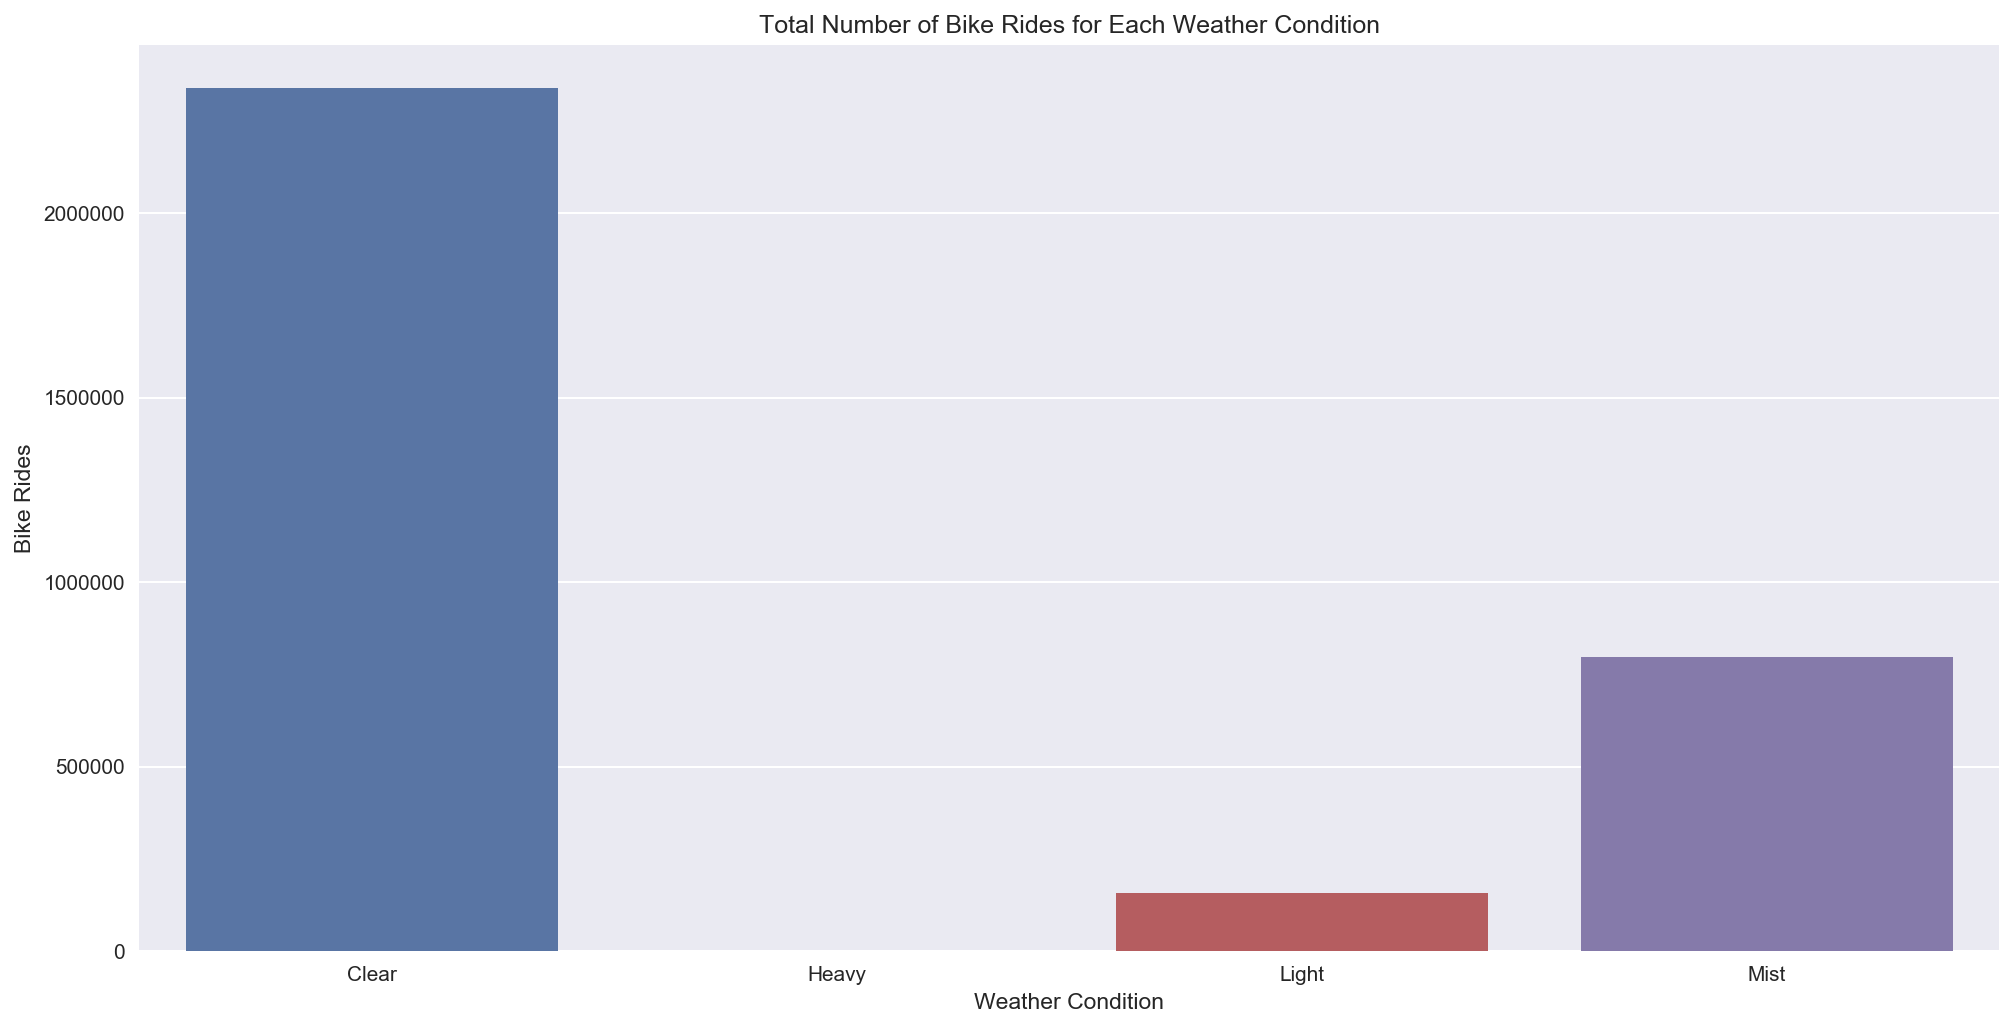

In [9]:
# Seaborn
sns.barplot(x = weather.index , y = 'cnt', data = weather);
plt.xlabel("Weather Condition")
plt.ylabel("Bike Rides")
plt.title("Total Number of Bike Rides for Each Weather Condition")

**Practice:** Now try making a barplot in either Matplotlib or Seaborn that shows the total number of bike rides for each day of the week.

In [10]:
grouped_days = ... #bike.groupby(...)

# YOUR CODE BELOW

<a id='scatterplots'></a>
## Scatterplots

Scatterplots are used to visualize relationships between **two numeric variables**, particularly if both of them are continuous numeric. A scatterplot consists of data points, or *markers*, that are plotted on an *x,y* coordinate plane. Each data point represents a single observation from a dataset and is characterized by two variables, one mapped to the x-axis and the other mapped to the y-axis.

However, unlike a lineplot, in a scatterplot there is not only one marker per x coordinate -value, and line segements do not connect each marker. Hence, a scatterplot often resembles **a cloud of data points** that hopefully resemble some discernible trend that can be used to summarize some sort of relationship or correlation between the x-variable and the y-variable.

<a id='pltscatter'></a>
### Scatterplots in Matplotlib
[Scatterplots in Matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) also have a similar function and argument structure as the lineplot function, `plt.plot()`. The function to make a scatterplot in Matplotlib is `plt.scatter()` which takes in the following essential arguments:

    plt.scatter(x_values, y_values)
    
Similar to `plt.plot()`, the `x_values` and `y_values` can be either in the form of NumPy arrays or Python lists.

**Practice:** Using the `bike` dataframe, make a Matplotlib scatterplot of the number of casual riders on the x-axis and the number of registered riders on the y-axis. Remember to label your axes and title your plot!

In [ ]:
# Your code here

The resulting plot should generate a lot of questions. There seem to be two clouds of points that seem to both have an upward trend, but in different directions. How can we investigate this further? Luckily, the utilities of Seaborn can help us out!

<a id='snsscatter'></a>
### Scatterplots in Seaborn
Plotting [scatterplots in Seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) has some extra data visualization advantages that either Matplotlib doesn't have or can't easily accomplish. Take, for example, the `hue` argument. Maybe the divergence we see in the cloud of points in our scatterplot may be due to another variable. Let's see!

**Practice:** Recreate your scatterplot from above, but this time use Seaborn and set `hue` equal to `"workingday"`. How does this give us more useful information about the relationship between the number of registered riders and the number of casual riders?

The function and syntax to create a scatterplot is as follows. Again, you should notice that it is very similar to its Matplotlib counterpart, and the arguments are similar to the other data visualization functions that we have learned so far.

    sns.scatterplot(x_values, y_values, hue) 
    sns.scatterplot(data, x_values, y_values, hue) 
The first version of `sns.scatterplot()` has `x_values` and `y_values` as either NumPy arrays or Python lists. The second version of `sns.scatterplot()` has `data` set to the name of a dataframe, and `x_values` and `y_values` are set to strings that are the column names of the desired x and y variables.

In [ ]:
# Your code here

We can now see that the relationship between the number of registered riders and the number of casual riders is very different depending on if we're looking at weekdays or weekends. But in terms of visual aesthetics, our plot could still use some improvements.

Particularly, the optional `s` argument can change the size of the data points by setting it to an integer, and `plt.figure(figsize)` can change how big or small the plot is. Run the cell below, then experiment with different values of `s` and different dimensions of `plt.figure(figsize)`.

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='casual',y='registered',data=bike, hue="workingday", s=20)

## Histograms
- Histograms are charts that show the distribution of a numerical variable
- Histograms use bins (each bar is a bin)
- Binning counts the number of numerical values within each bin
- The vertical axis is a rate (e.g. % per year)
- The **area** of each bin is the proportion of individuals within that bin
- The total area of the distribution sums to 1
- Matplotlib documentation for [histograms](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
- Seaborn documentation for [histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html)
**Useful resources:** 
- Data 8 [Slides](https://docs.google.com/presentation/d/1gak73b-xDk2VnQeS-MvEpTrxV1xPP5gy9g0nfiiBx5Q/edit#slide=id.g40eea6abfe_0_95)
- Data 8 [Textbook](https://www.inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)

In [13]:
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


(array([ 207.,  154.,  166.,   78.,   46.,   20.,   26.,   22.,    7.,    5.]),
 array([   0,  350,  700, 1050, 1400, 1750, 2100, 2450, 2800, 3150, 3500]),
 <a list of 10 Patch objects>)

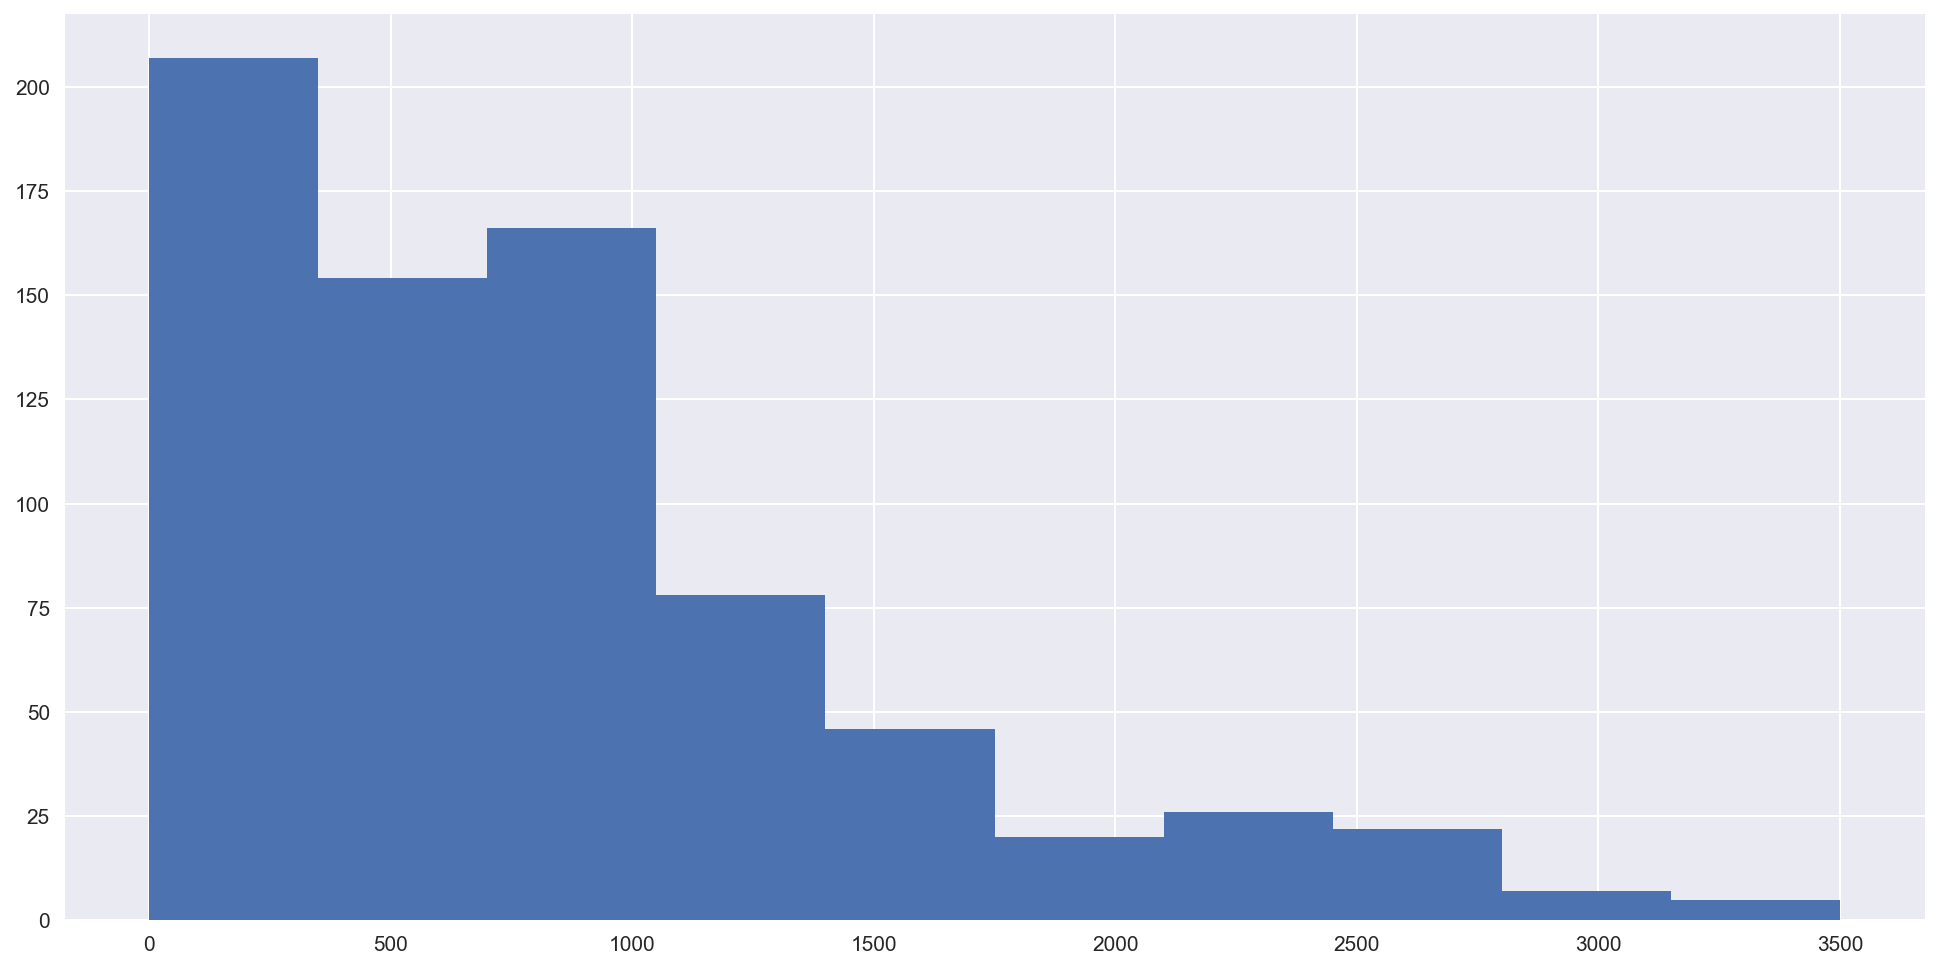

In [17]:
# Matplotlib
bins = np.arange(0, 3410 + 350, 350)
plt.hist(daily_counts['casual'], bins = bins)

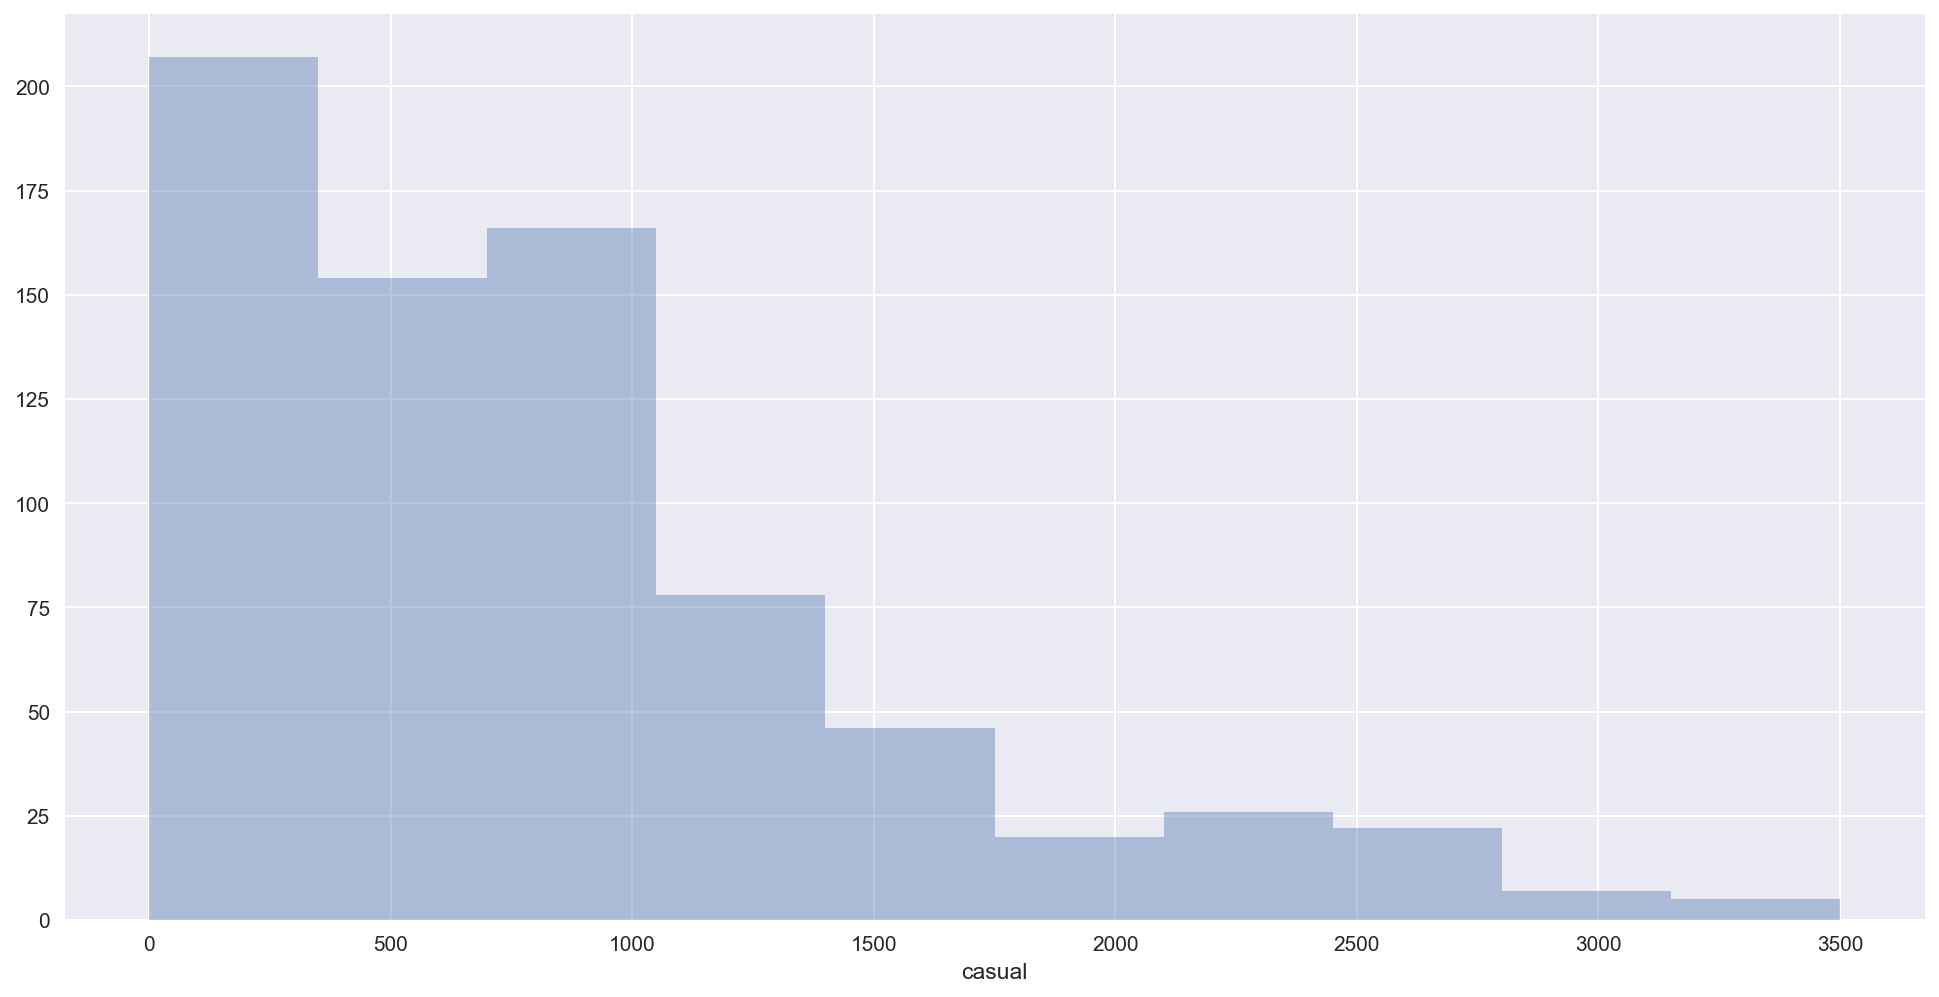

In [18]:
# Seaborn
sns.distplot(daily_counts['casual'], bins = bins, kde = False)

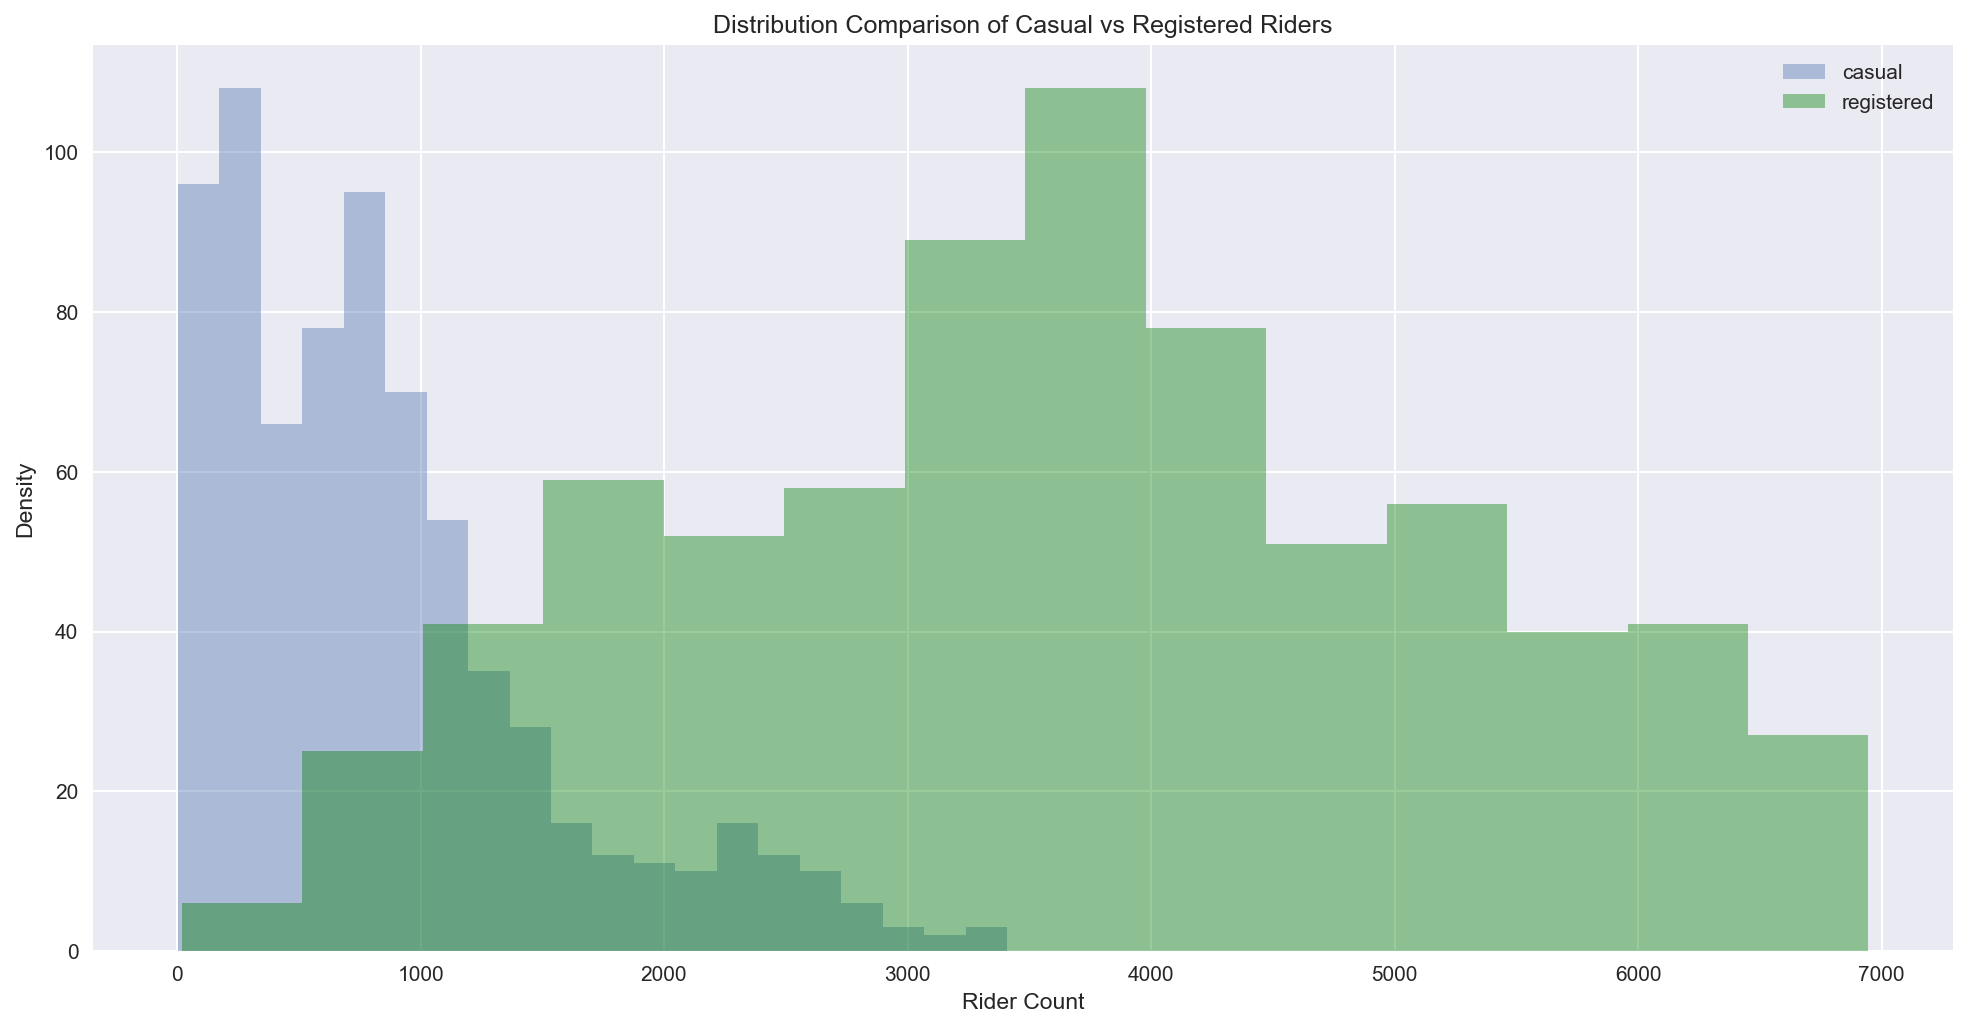

In [19]:
sns.distplot(daily_counts['casual'], label='casual', kde = False)
sns.distplot(daily_counts['registered'],  label='registered', kde = False, color='green')
plt.legend()
plt.title("Distribution Comparison of Casual vs Registered Riders")
plt.xlabel("Rider Count")
plt.ylabel("Density");

**Practice:** Make a histogram showing the distribution of the total rider count


Text(0,0.5,'...')

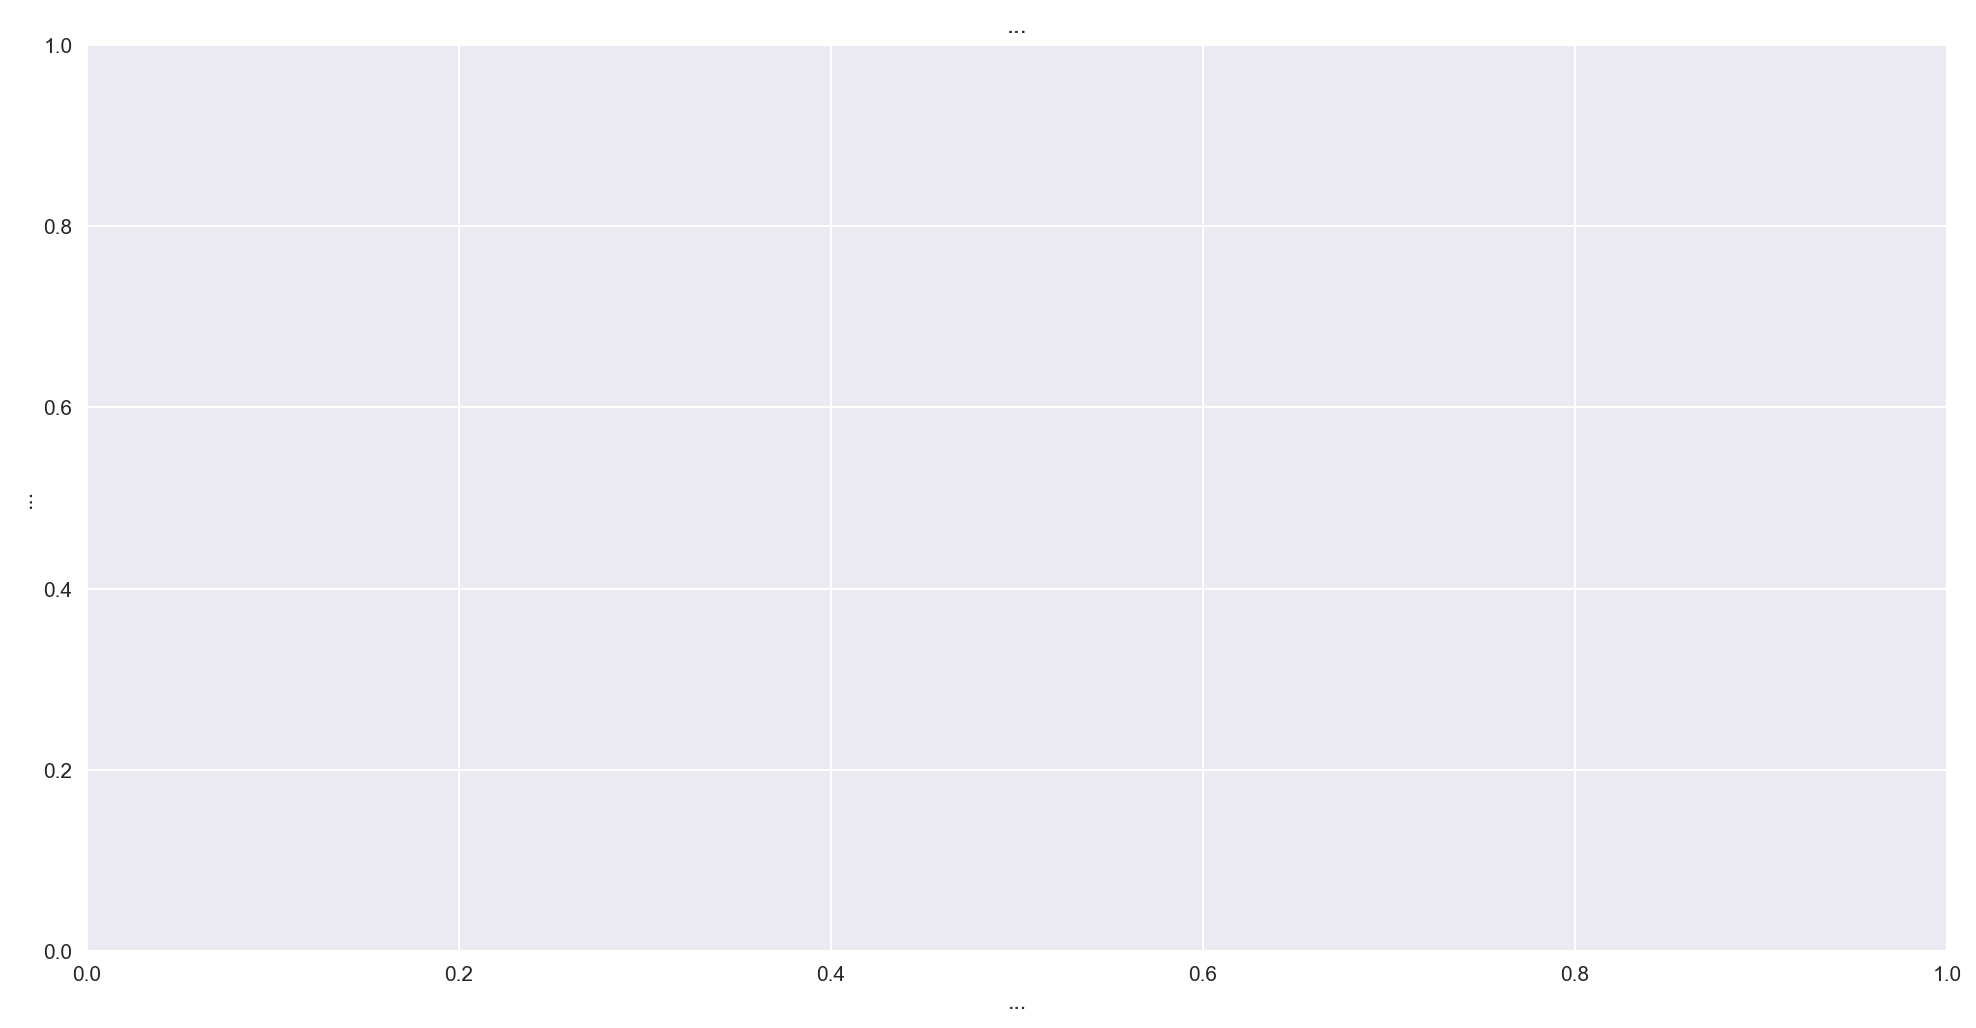

In [20]:
total_count = daily_counts['casual'] + daily_counts['registered']

...
plt.title("...")
plt.xlabel("...")
plt.ylabel("...")

<a id='snskde'></a>
## Kernel Density Estimation Plots



A Kernel Density Estimation plots, often called a KDE plot, is a type of plot that is used to create a smooth curve based on a set of empirical **continuous numeric** data observations. Data we collect is from a sample; based on a set of sample data, we want to estimate the population distribution from which the data came from. In this way, we can generalize any appropriate or relevant conclusions we might make from analyzing our sample data to our population of interest. 

Think of a KDE plot as a smooth, continuous alternative to a histogram that can visualize the shape of some data. Like a histogram, the area underneath a KDE curve is 1. Wherever our data is most concentrated, the KDE curve has a maximum peak. Bandwidth is also an important characteristic of KDE plots. Think of bandwidth as analogous to bin size for histograms: the smaller the bin size, the more variability you see in your data; the larger the bin size, the less variability you see in your data. The same is true for KDE bandwidths!

[Here](https://mathisonian.github.io/kde/) is a website that demos KDE plots. Let's check it out together!

Another way to think about KDE plots is a curve that represents the sum of smaller curves (or *kernels*) such that each data point has its own kernel. The individual kernels are scaled so that the overal KDE plot has an area of 1; for example, if you have 10 data points, each point can be thought of having its own kernel with area $\frac{1}{10}$. The image below compares a histogram with a corresponding KDE plot:

<img src="Comparison_of_1D_histogram_and_KDE.png" width="600px" /> 

Seaborn is especially efficient in plotting KDE visualizations. The [function](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create a KDE plot in Seaborn is as follows. Note that the essential data argument is a single NumPy array or Python list of data. The optional `shade` argument lightly shades in the area underneath the KDE curve when set equal to `True`. The optional `color` argument can be set to a string of the name of the color you want your plot to be.
    
    sns.kdeplot(data, shade, color)
    
**Practice:** Use the `daily_counts` dataframe below to plot an overlaid KDE plot of the distribution of the total counts for registered riders and casual riders. Shade in each one. Make the the `registered` riders plot green and make the casual riders plot "steelblue." Make sure to label your axes and title your graph and use `plt.legend()` to create a color code legend. (Label your y-axis as "Density.")

In [12]:
daily_counts = bike[["dteday","casual","registered","cnt", "workingday"]].groupby("dteday").agg(
    {"casual":sum, "registered":sum, "cnt":sum, "workingday":min})

daily_counts.head()

,casual,registered,cnt,workingday
dteday,,,,
2011-01-01,331,654,985,0
2011-01-02,131,670,801,0
2011-01-03,120,1229,1349,1
2011-01-04,108,1454,1562,1
2011-01-05,82,1518,1600,1


In [ ]:
# Your code here

Another cool thing Seaborn can do is overlay a KDE plot to a corresponding histogram! This can also help to conceptualize the relationship between a KDE plot and a histogram. And all of this can be accomplished in [one simple Seaborn function](http://seaborn.pydata.org/generated/seaborn.distplot.html)! The function and syntax for this is as follows:

    sns.distplot(data, kde=True)
    
where `data`, again, is a single NumPy array or Python list of data. 

**Practice:** Use the `daily_counts` dataframe to make overlaid histograms of the distribution of the total counts for registered riders and casual riders, with KDE plots overtop their corresponding histograms. Make the the `registered` riders plot green and make the casual riders plot "steelblue." Make sure to label your axes and title your graph. (Label your y-axis as "Density.")

*Hint:* Use the optional `label` argument in each call to `sns.distplot()` to create legend labels according to your colors, and in a separate code line, use `plt.legend()`. Set `label` equal to the string "casual" for your casual riders plot, and set `label` equal to "registered" for your registered riders plot.

In [ ]:
# Your code here

## Box and Violin Plots 
- Matplotlib [documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)
- Seaborn [documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Text(0.5,1,'Distribution of Casual Rider Counts')

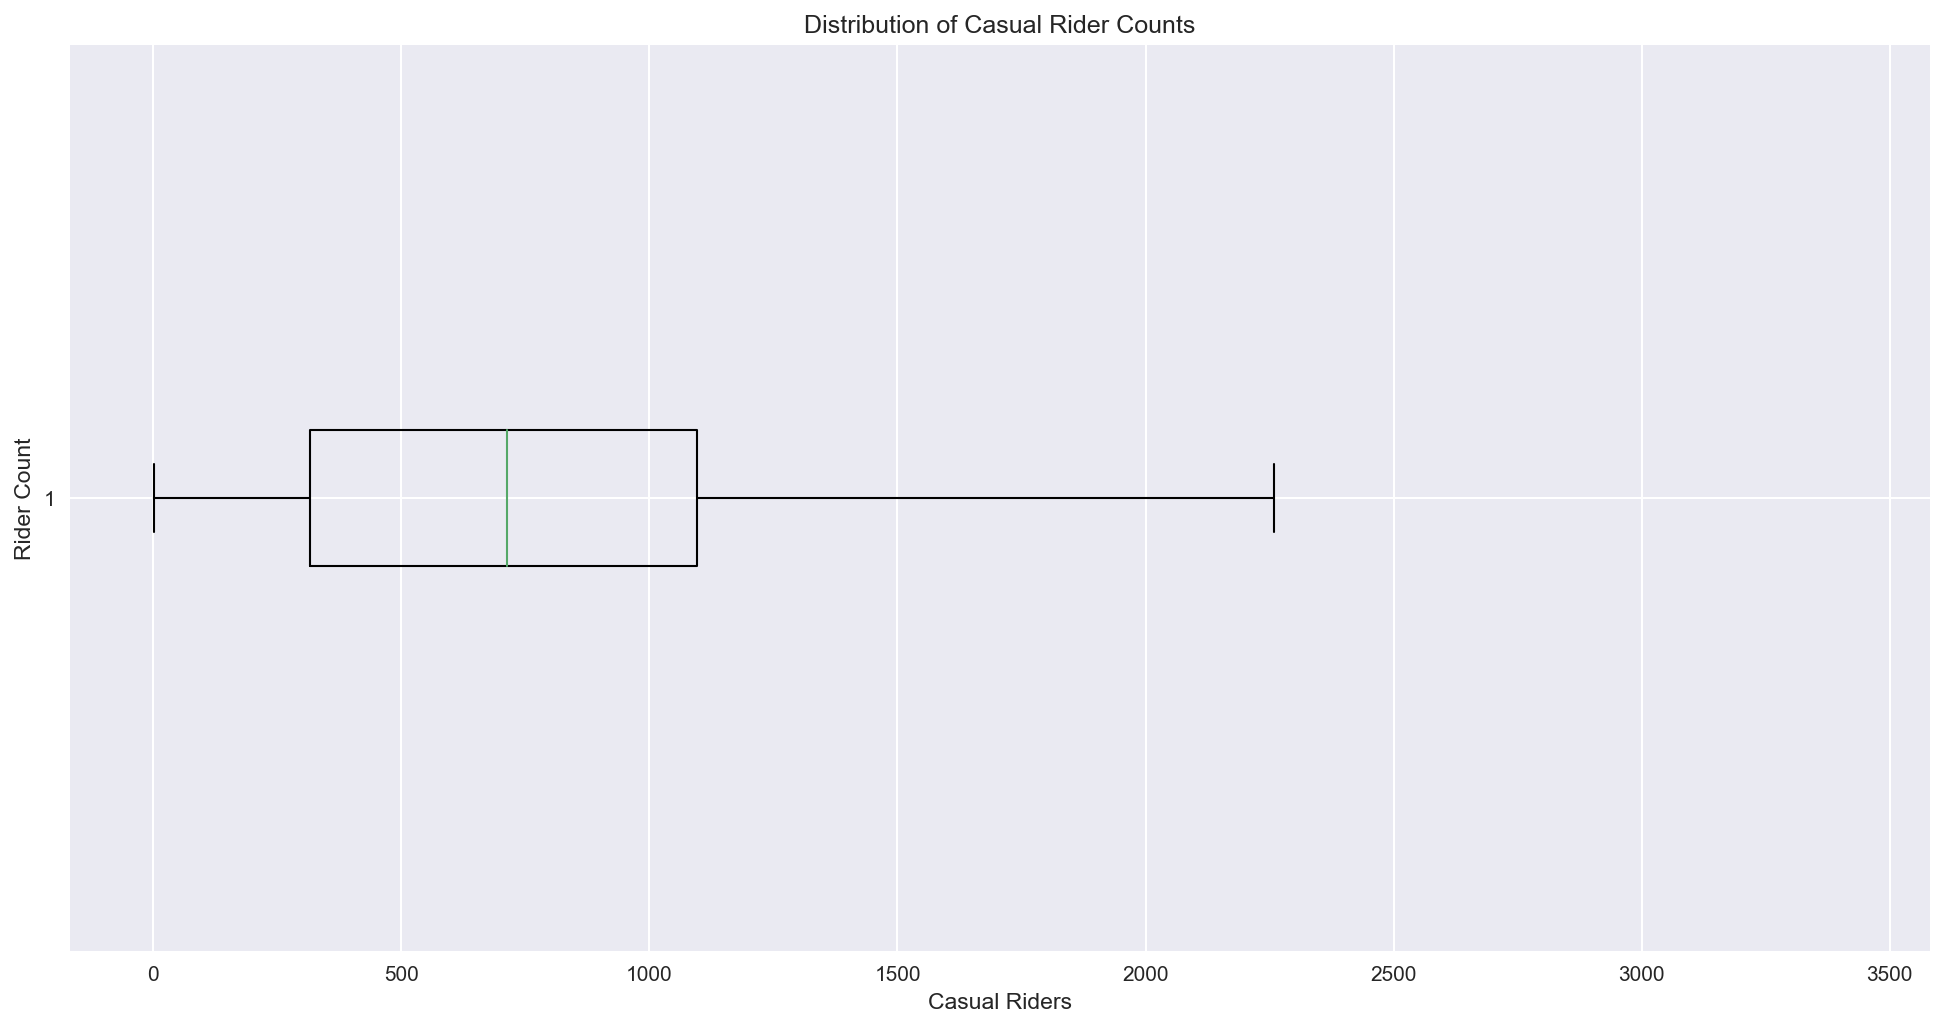

In [21]:
plt.boxplot(daily_counts['casual'], vert = False);
plt.xlabel("Casual Riders")
plt.ylabel("Rider Count")
plt.title("Distribution of Casual Rider Counts")

Text(0.5,1,'Distribution of Casual Rider Counts')

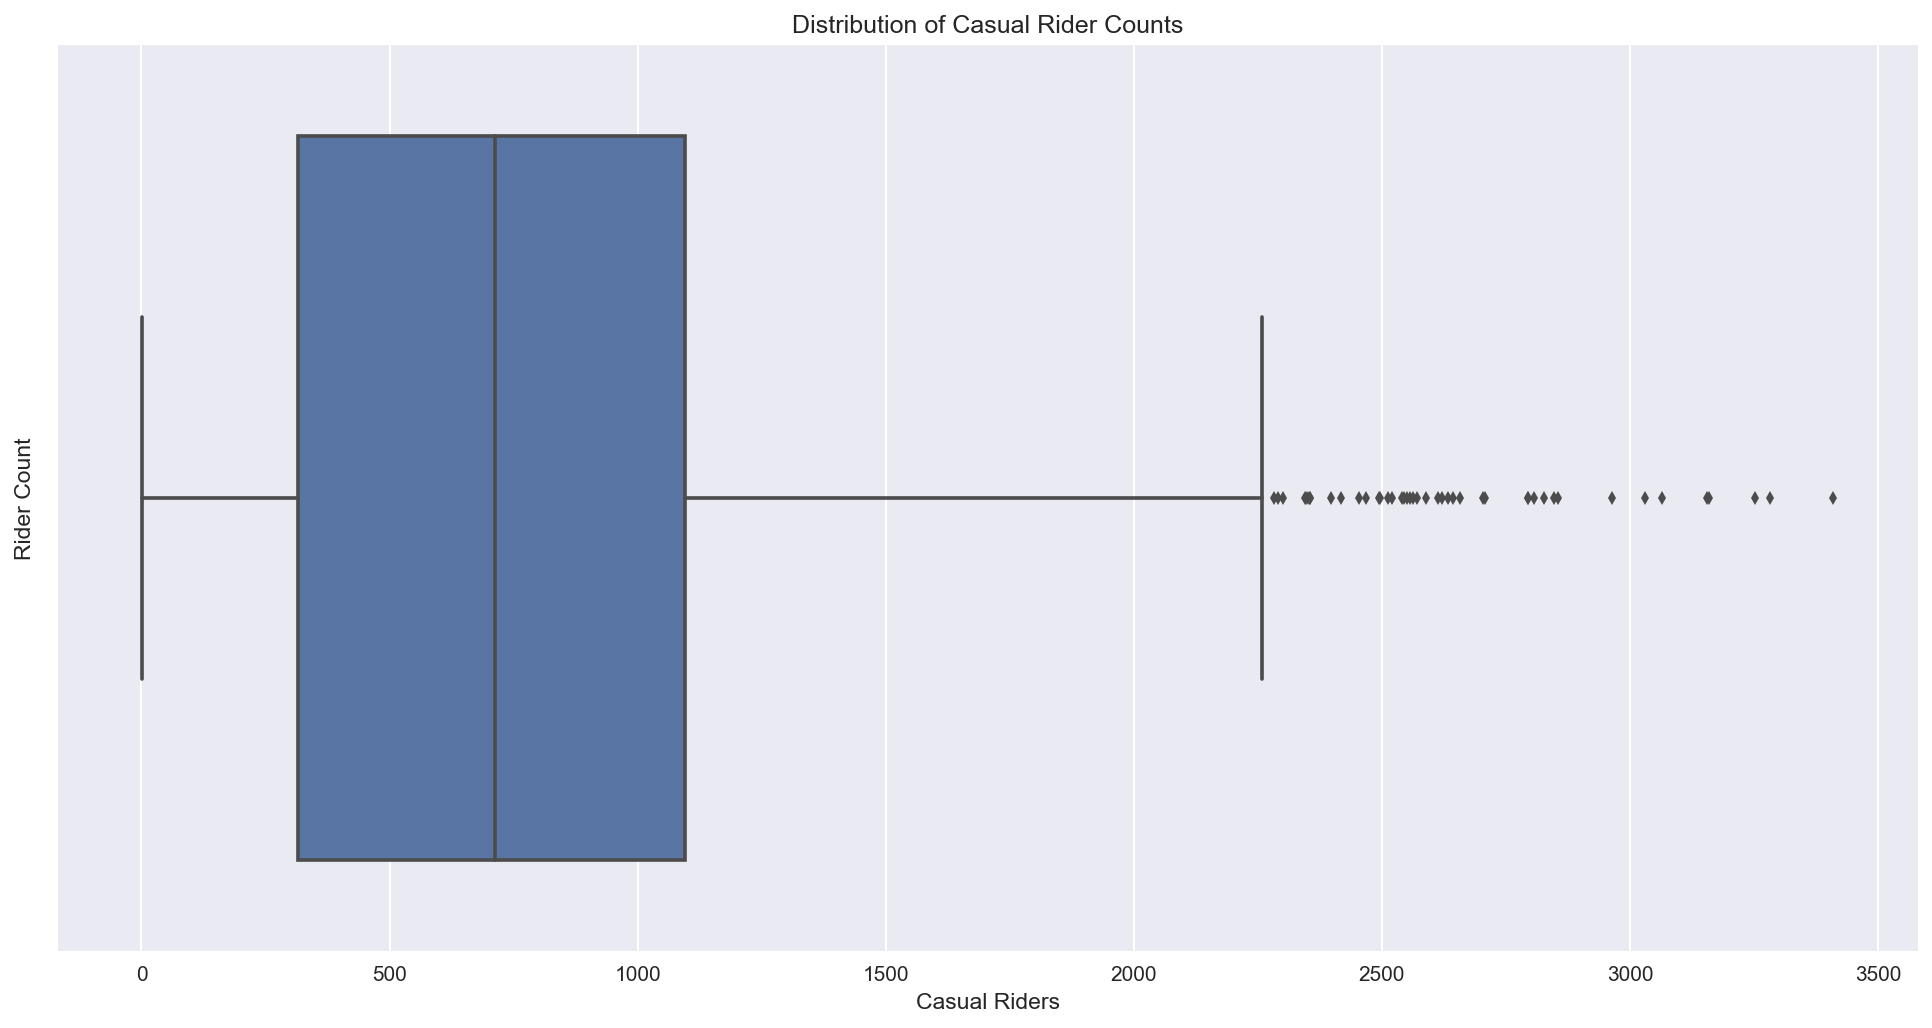

In [22]:
sns.boxplot(daily_counts['casual']);
plt.xlabel("Casual Riders")
plt.ylabel("Rider Count")
plt.title("Distribution of Casual Rider Counts")

**Practice:** Try making a boxplot below of the distribution of registered riders. Don't forget your labels and titles!

In [23]:
# YOUR CODE HERE

**Violin Plots** are used to visualize the distribution and probability density of a numerical variable. 

Text(0.5,1,'Distribution of Casual Rider Counts')

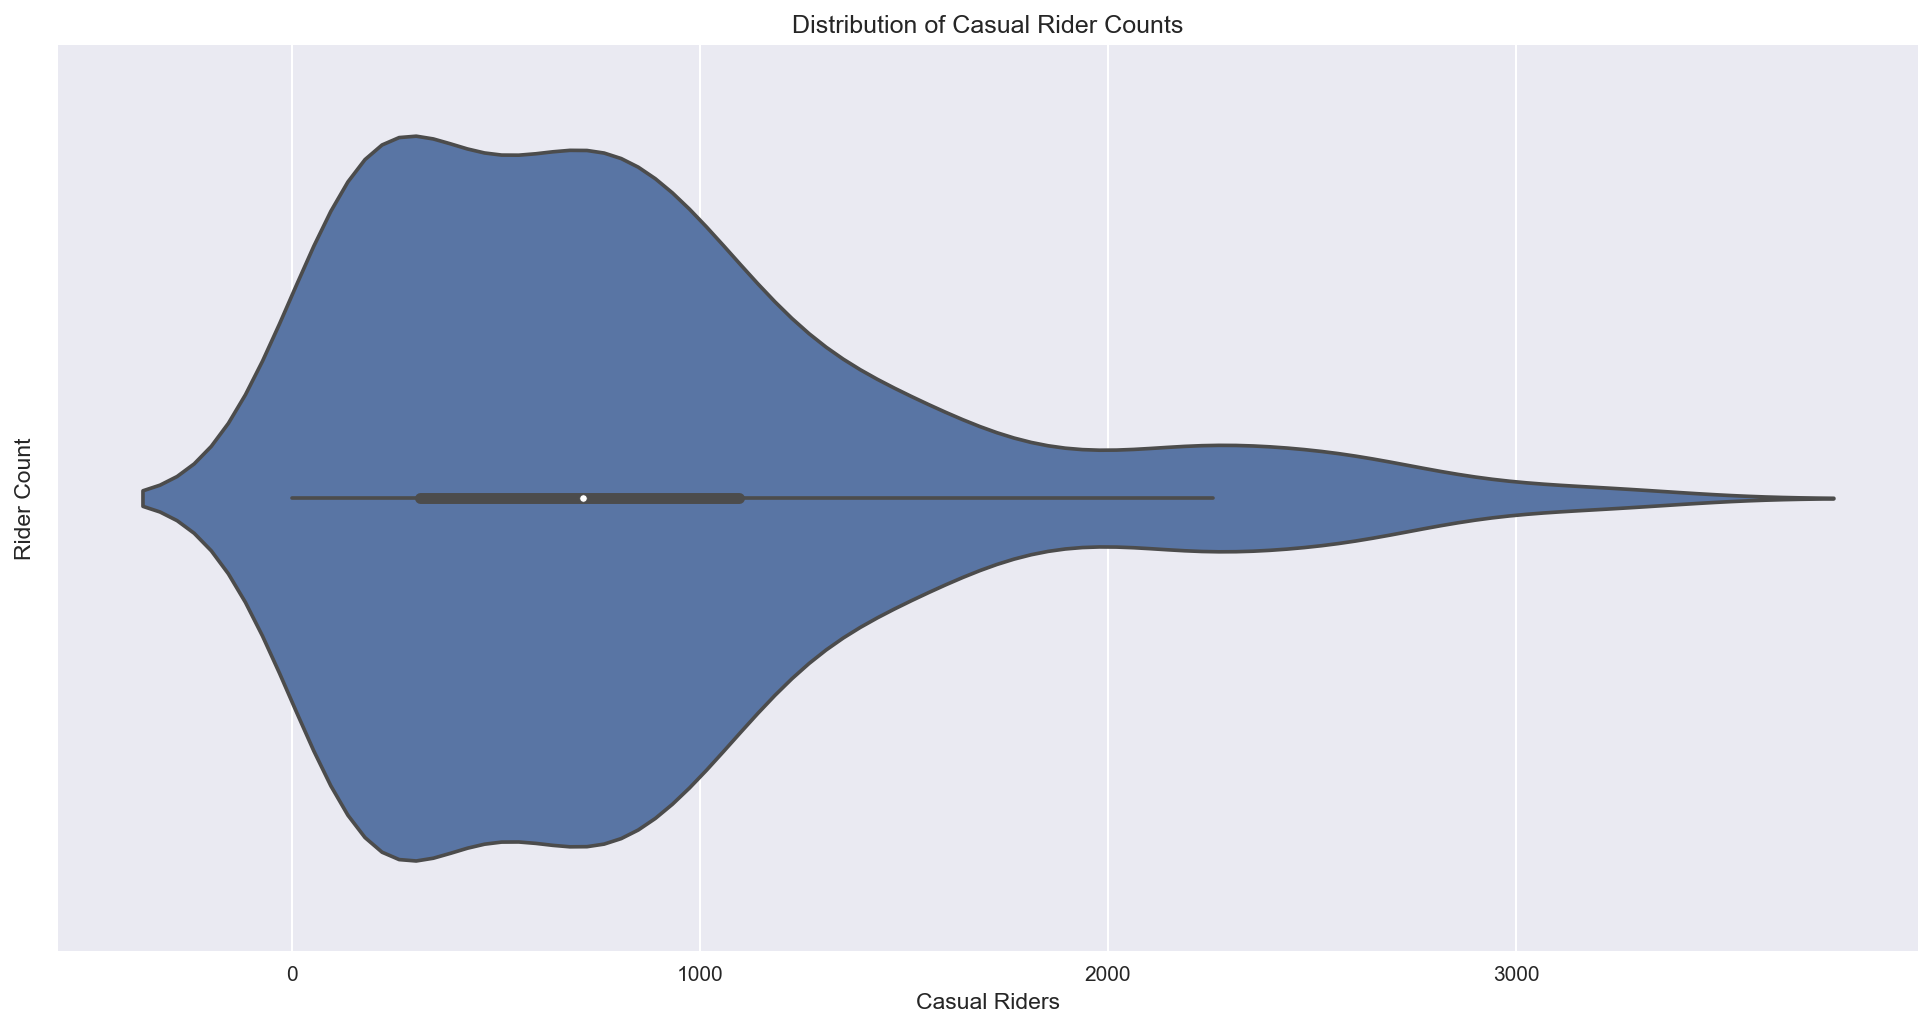

In [24]:
sns.violinplot(daily_counts['casual'])
plt.xlabel("Casual Riders")
plt.ylabel("Rider Count")
plt.title("Distribution of Casual Rider Counts")

## Resources/References
* [Data100 Fall 2019: Visualization I, Visualization II, Homework 3; by Professors Josh Hug and Deborah Nolan](http://www.ds100.org/fa19/syllabus/)
* [Kernel Density Estimation, by Suraj Rampure](http://www.surajrampure.com/resources/ds100/KDE.html)
* [Kernel Density Estimation, Wikipedia](https://en.wikipedia.org/wiki/Kernel_density_estimation)